In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=0.8)
%matplotlib widget

In [316]:
#Number of agents
N = 4

In [317]:
ifile = "params/N4/simulation_params_N4C1.0.dat"
plot_folder = "plots/"
plot_subfolder1 = "data_distribution/N4/" 

## Load data

In [318]:
df = pd.read_table(ifile, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_179757/1870271977.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(ifile, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.498613,0.000956,0.249177,0.000478,0.250000,0.000000,0.500000,1.000,0.999500,-3.245160e-07,1.0000
1,0.399200,0.122242,0.181970,0.053588,0.349782,0.066832,0.500000,0.500,0.985733,6.953855e-05,0.9335
2,0.337863,0.275482,0.128740,0.104973,0.323496,0.165492,1.000000,0.525,0.956387,1.393205e-05,0.7780
3,0.259599,0.075767,0.184297,0.052729,0.533270,0.188166,0.500000,0.625,0.917432,5.653878e-05,0.7065
4,0.488474,0.001966,0.248325,0.001000,0.250000,0.000000,0.500000,1.000,0.999500,-7.195674e-07,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
596,0.370464,0.220876,0.151097,0.089788,0.318874,0.153237,1.000000,0.425,0.964834,5.340705e-05,0.8550
597,0.324083,0.166027,0.139820,0.071026,0.470610,0.079234,0.250000,50.750,0.976004,4.422271e-05,0.8755
598,0.412295,0.185606,0.173587,0.077686,0.338645,0.088453,0.500000,25.500,0.986856,3.852890e-05,0.9330
599,0.477770,0.006292,0.246857,0.003256,0.341017,0.000940,0.500000,1.000,0.999406,-2.162836e-06,0.9995


In [319]:
df['efficiency'].describe()

count    601.000000
mean       0.421225
std        0.070229
min        0.183768
25%        0.371336
50%        0.424392
75%        0.490121
max        0.500173
Name: efficiency, dtype: float64

In [320]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [321]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [322]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [323]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [324]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
#df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='efficiency', ylabel='inequality'>

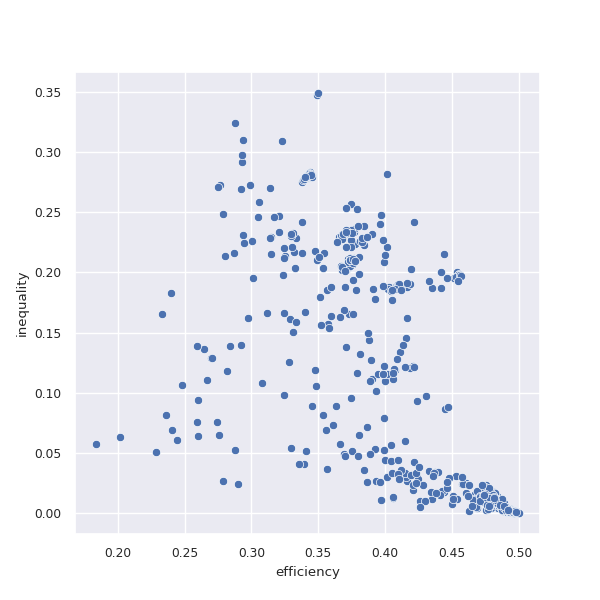

In [325]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='efficiency', y='inequality')

## Standardize data

In [326]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [327]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [328]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(601, 3)

# 2D

## t-sne

In [329]:
from sklearn.manifold import TSNE

In [330]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 2)

In [331]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,-1.487361,-27.052368,0.498613,0.000956,0.249177,0.000478,0.250000,0.000000,0.5,1.000,0.999500,-3.245160e-07,1.0000
1,5.786669,16.510212,0.399200,0.122242,0.181970,0.053588,0.349782,0.066832,0.5,0.500,0.985733,6.953855e-05,0.9335
2,-26.365717,17.494484,0.337863,0.275482,0.128740,0.104973,0.323496,0.165492,1.0,0.525,0.956387,1.393205e-05,0.7780
3,20.520292,3.678061,0.259599,0.075767,0.184297,0.052729,0.533270,0.188166,0.5,0.625,0.917432,5.653878e-05,0.7065
4,-7.128711,-18.974012,0.488474,0.001966,0.248325,0.001000,0.250000,0.000000,0.5,1.000,0.999500,-7.195674e-07,1.0000


In [332]:
df_tsne_res['cond_entropy'].describe()

count    601.000000
mean       0.051236
std        0.060961
min        0.000000
25%        0.000000
50%        0.002853
75%        0.088034
max        0.232263
Name: cond_entropy, dtype: float64

Pure segmentation: cond_entropy=0, entropy=0, efficiency=0.5, inequality=max\
Pure alternation: cond_entropy=0, entropy>0, efficiency=0.5, inequality=0


In [333]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

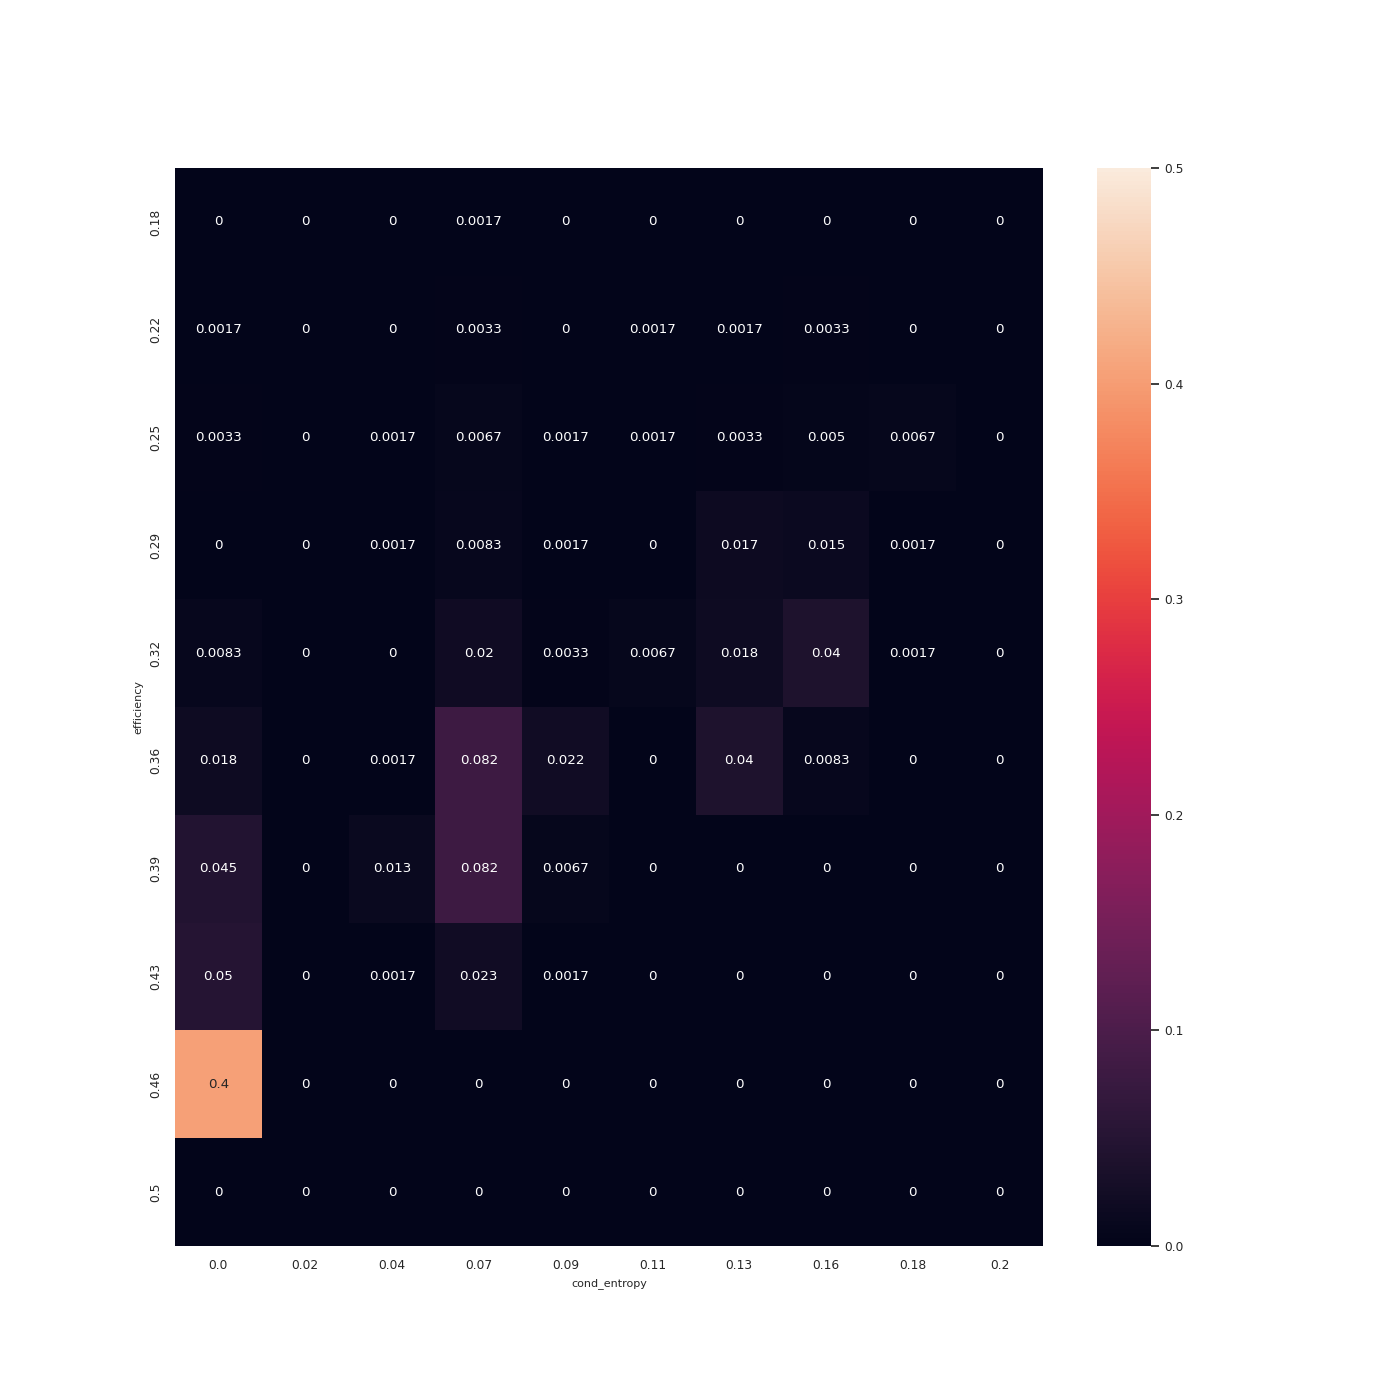

In [334]:
fig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'eff_centropy/eff_centropy_'+fname)

In [335]:
nbins = 10
xinf = df_tsne_res['inequality'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['inequality']>=x[i]) & (df_tsne_res['inequality']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

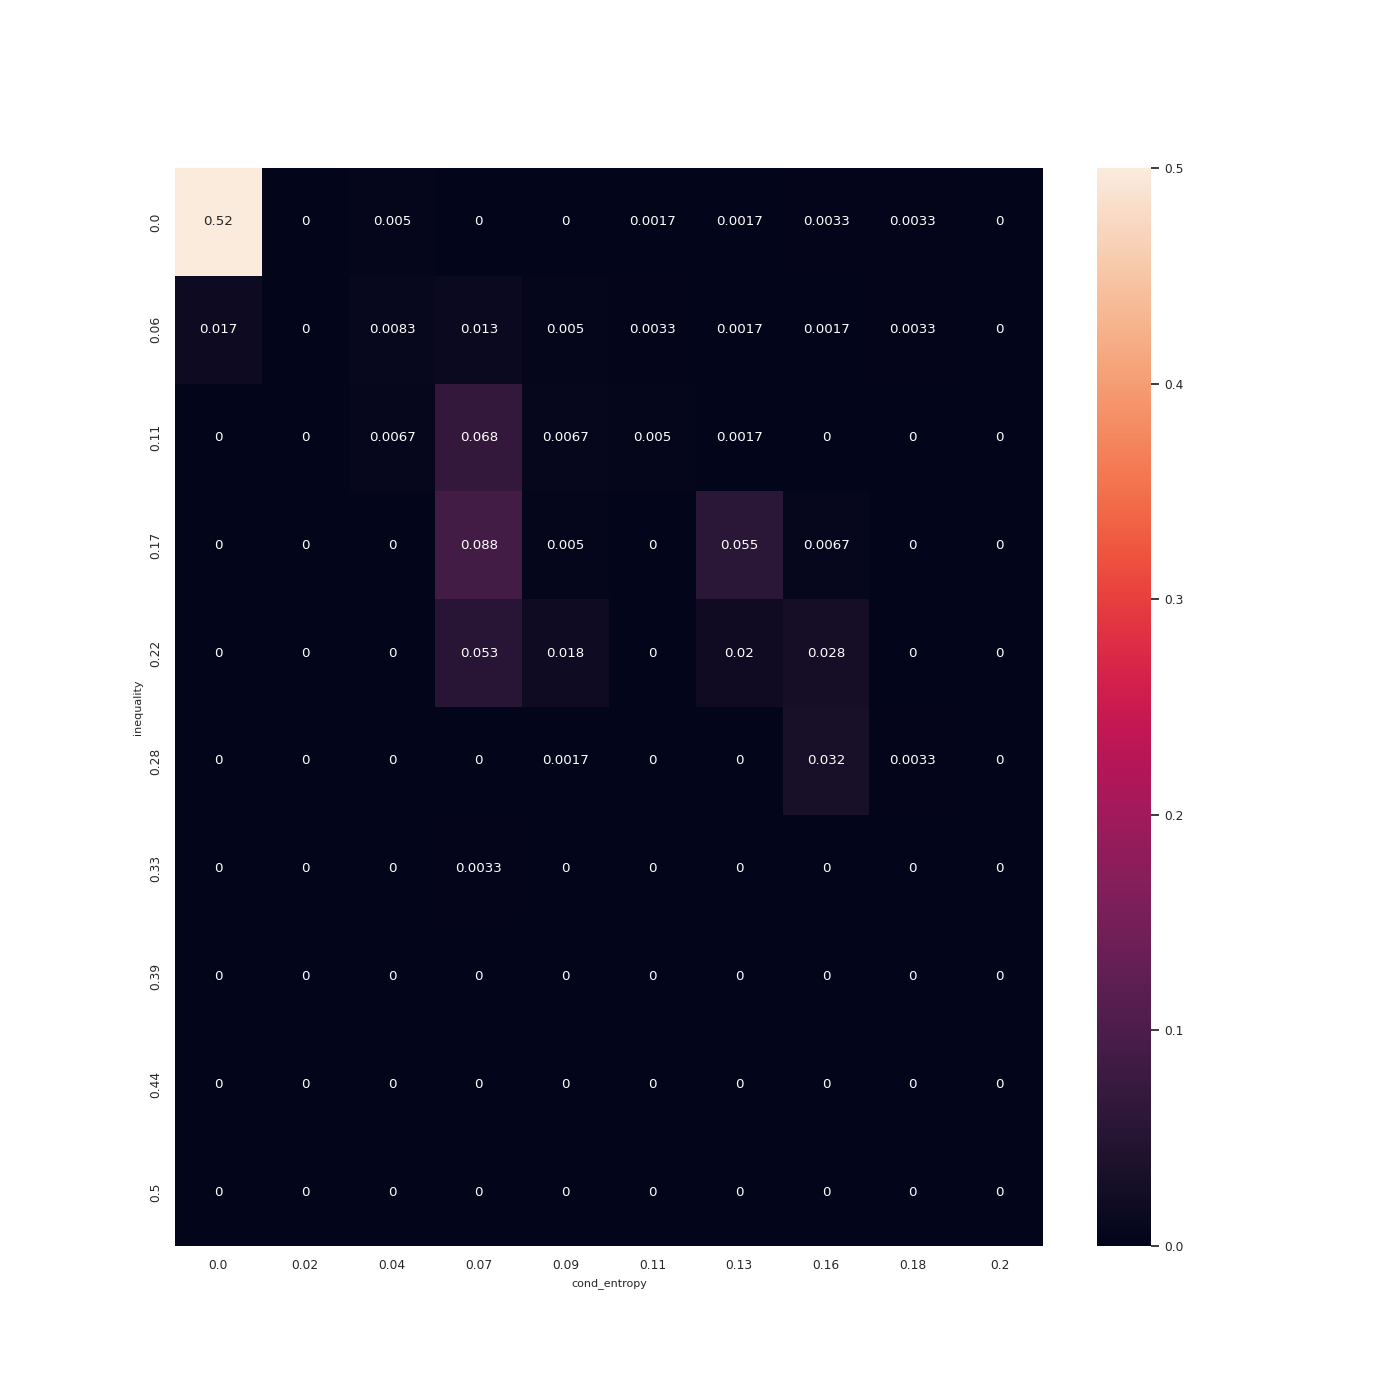

In [336]:
fig1, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('inequality',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'ineq_centropy/ineq_centropy_'+fname)

In [337]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['inequality'].min()
ysup = 0.5 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) & 
                           (df_tsne_res['inequality']>=y[j]) & (df_tsne_res['inequality']>=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

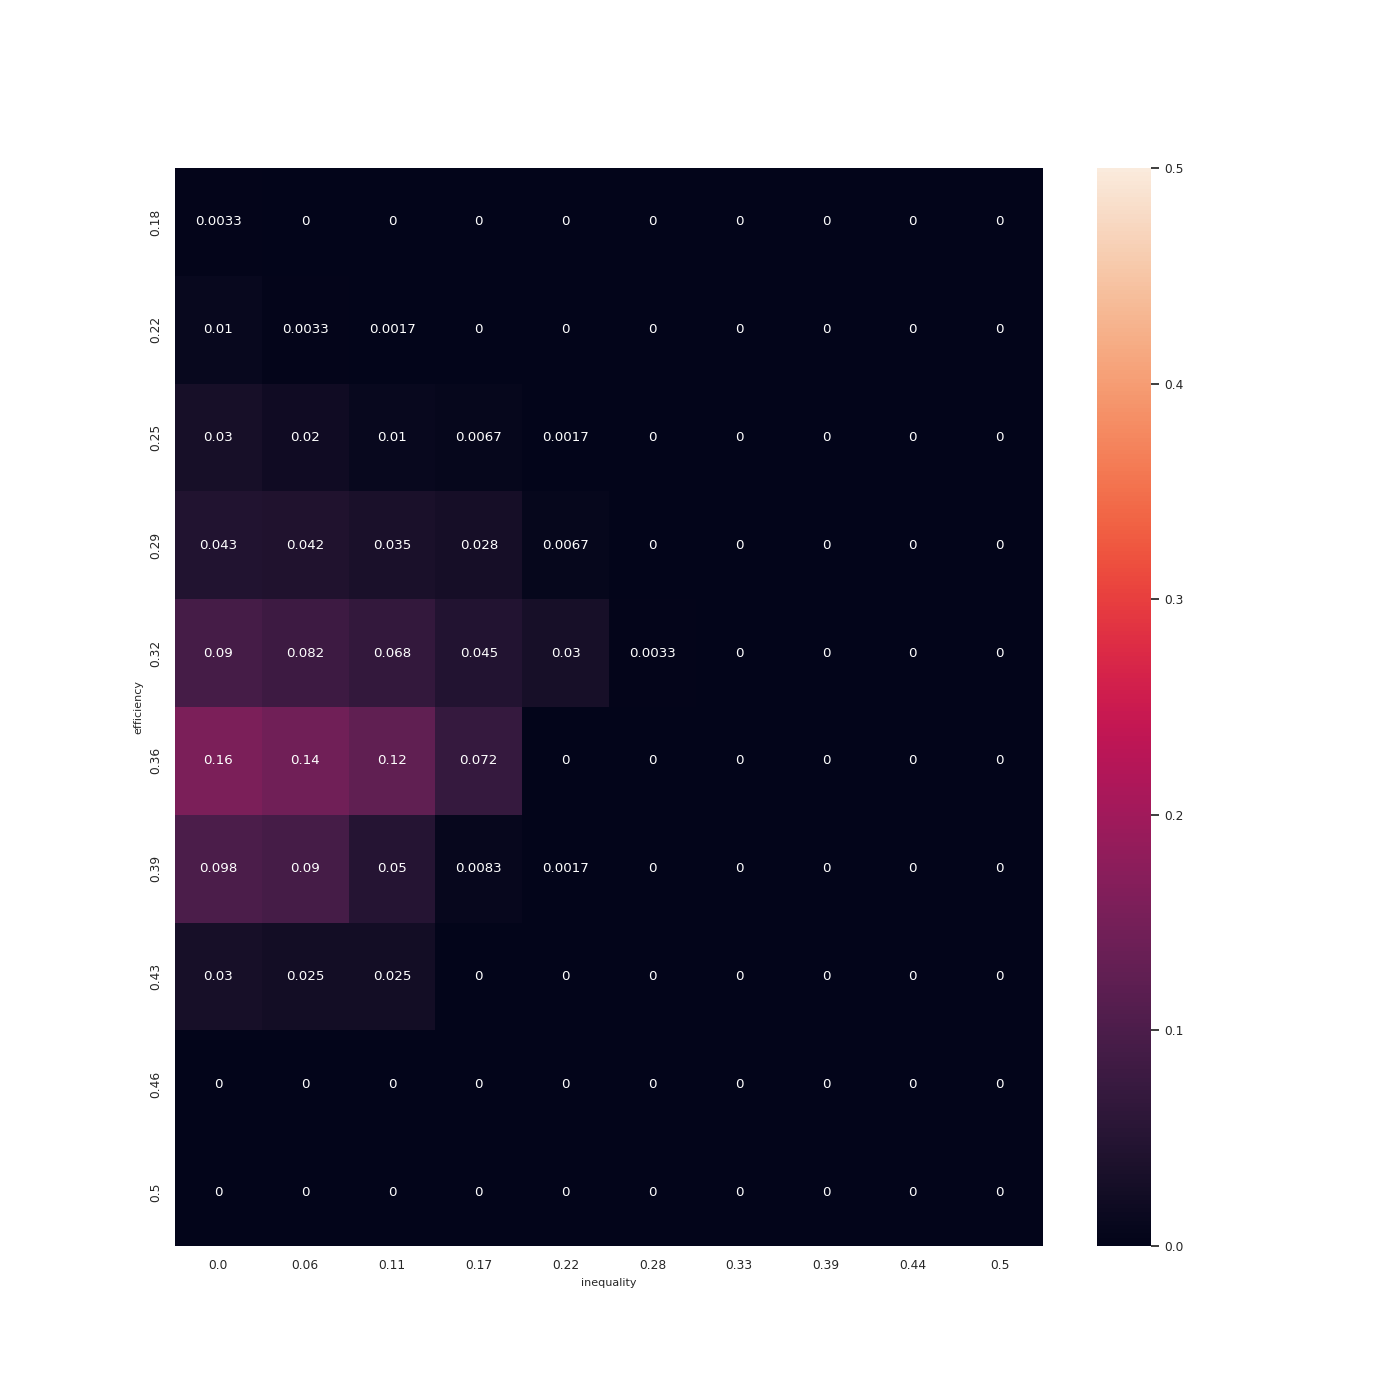

In [338]:
fig2, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('inequality',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'eff_ineq/eff_ineq_'+fname)

In [339]:
df_tsne_res[(df_tsne_res['tsne_1']>-30) & (df_tsne_res['tsne_1']<29) & (df_tsne_res['tsne_2']>-23) & (df_tsne_res['tsne_2']<-22)]

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
56,-6.176300,-22.874161,0.492807,0.001686,0.248862,0.000852,0.25,0.0,0.5,1.0,0.9995,-5.816864e-07,1.0
102,-5.938482,-22.597599,0.492027,0.001601,0.248816,0.000810,0.25,0.0,0.5,1.0,0.9995,-5.480240e-07,1.0
133,-6.246362,-22.012804,0.493414,0.001601,0.248733,0.000807,0.25,0.0,0.5,1.0,0.9995,-6.022762e-07,1.0
246,-6.488431,-22.272646,0.495927,0.001713,0.248783,0.000859,0.25,0.0,0.5,1.0,0.9995,-6.330604e-07,1.0
281,-5.834069,-22.972673,0.495927,0.001632,0.248869,0.000819,0.25,0.0,0.5,1.0,0.9995,-5.749420e-07,1.0
306,-6.011969,-22.571869,0.490814,0.001603,0.248813,0.000813,0.25,0.0,0.5,1.0,0.9995,-5.791665e-07,1.0
395,-6.427526,-22.791292,0.495234,0.001757,0.248868,0.000883,0.25,0.0,0.5,1.0,0.9995,-6.330604e-07,1.0
562,-5.783280,-22.329807,0.495234,0.001566,0.248781,0.000787,0.25,0.0,0.5,1.0,0.9995,-5.883536e-07,1.0
589,-5.522227,-22.486631,0.496967,0.001468,0.248785,0.000735,0.25,0.0,0.5,1.0,0.9995,-5.399578e-07,1.0


In [340]:
## Percent of segmented simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.95*mx
#df_seg = df_tsne_res[(df_tsne_res['inequality']>mn) & (df_tsne_res['emax_perc']>0.95)]
#df_seg.shape[0]/df.shape[0]

In [341]:
## Percent of alternating simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.05*mx
#df_alt = df_tsne_res[(df_tsne_res['inequality']<mn) & (df_tsne_res['emax_perc']>0.95)]
#df_alt.shape[0]/df.shape[0]

In [342]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

2 0.6052202260324598
3 0.7084500404819345
4 0.7086139348097318
5 0.6834138765699803
6 0.7050962734140194
7 0.7050232419800752
8 0.7204662343253018
9 0.7281486948649479
10 0.6971007942057551
11 0.6972675130039782
12 0.69742744674767
13 0.6972085221556744
14 0.679241518787944
15 0.616795511259098
16 0.626148184504354
17 0.6199956439040724
18 0.6195770859433942
19 0.6184625751916156
20 0.6227842802196318


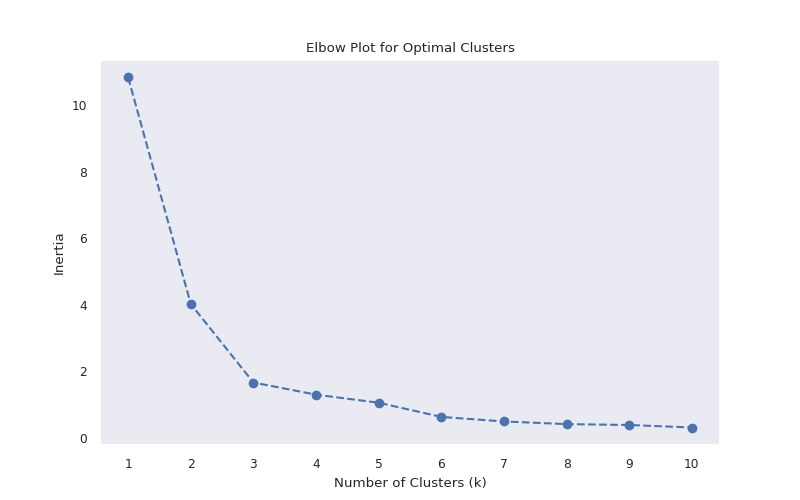

In [343]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [344]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [345]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [346]:
lab1 = 'efficiency'
lab2 = 'cond_entropy'
lab3 = 'inequality'
lab4 = 'kmeans'

In [347]:
#idx = 449
#point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
#point

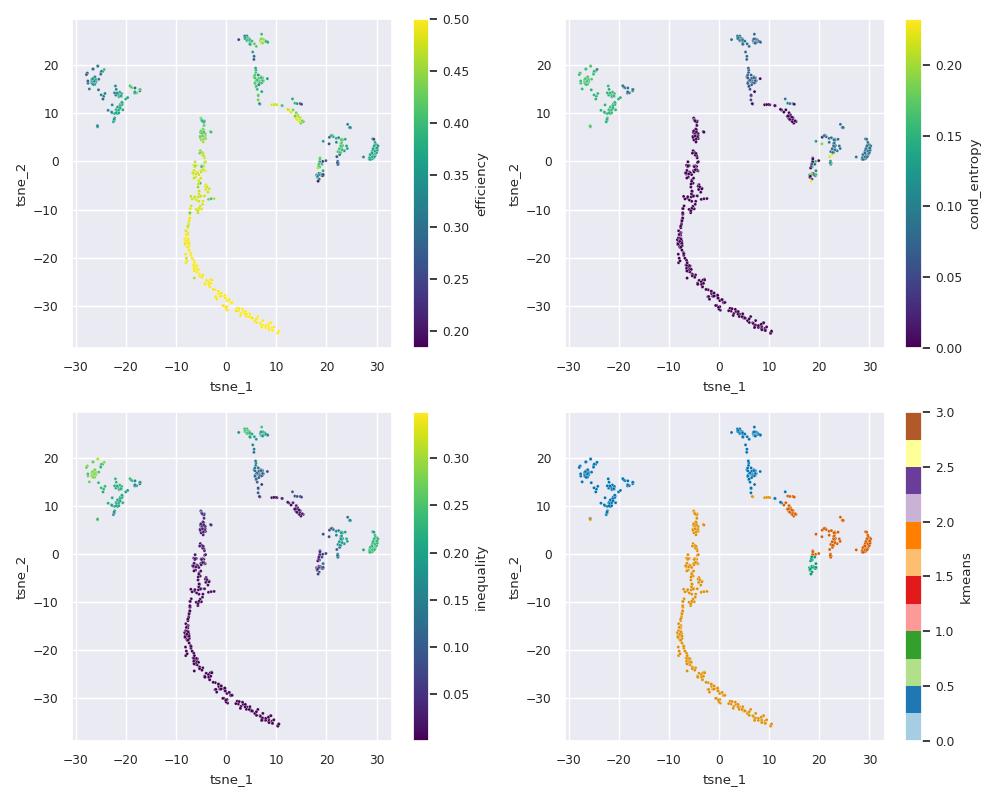

In [348]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='colorblind',s=5)
#sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [349]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [350]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [351]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [352]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [353]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [354]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.89      1.00      0.94        86
           2       0.00      0.00      0.00         6
           3       0.82      0.76      0.79        37

    accuracy                           0.88       181
   macro avg       0.66      0.66      0.66       181
weighted avg       0.85      0.88      0.87       181


Confusion Matrix:
[[46  6  0  0]
 [ 0 86  0  0]
 [ 0  0  0  6]
 [ 4  5  0 28]]


/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [356]:
model.coef_

array([[-3.57521063,  3.19892474, -1.77464343],
       [ 4.38949407, -3.48388055, -6.68423993],
       [ 0.15698023, -0.16401355,  3.71242897],
       [-0.97126367,  0.44896936,  4.74645439]])